# Setup

## import libraries and modules

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from itertools import permutations
from pandas_profiling import ProfileReport
import sweetviz as sv
from matplotlib_venn import venn3

%matplotlib inline

## set constants

In [3]:
TRAIN = 'train.csv'

## read training set to file

In [4]:
df = pd.read_csv(TRAIN)

# EDA over labels

## Profiling with of the shelf packages

### pandas profiling

In [17]:
profile = ProfileReport(df)
profile

### sweetviz


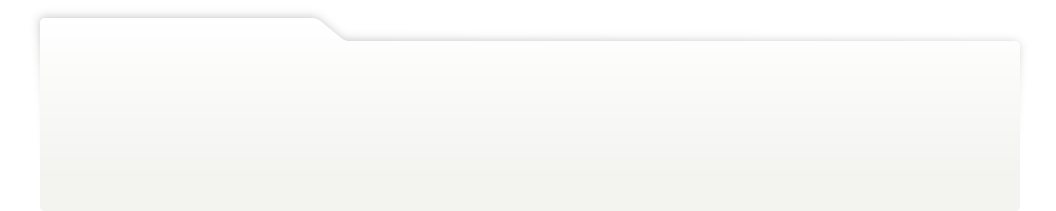
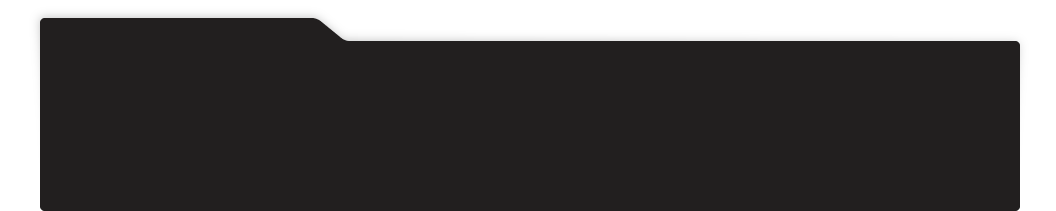
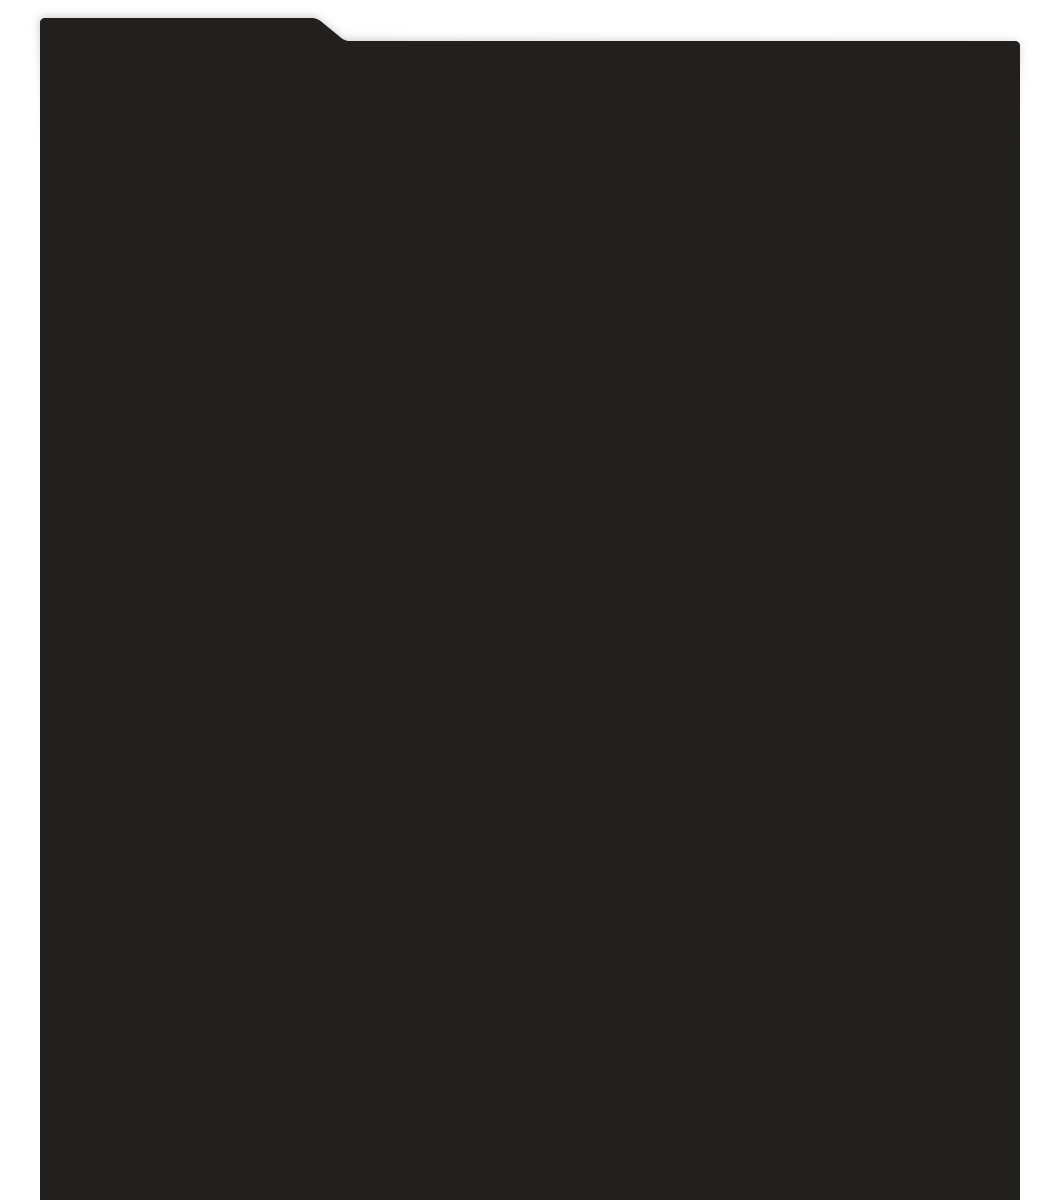
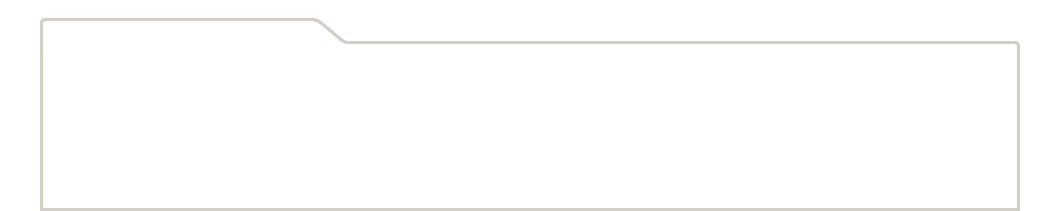
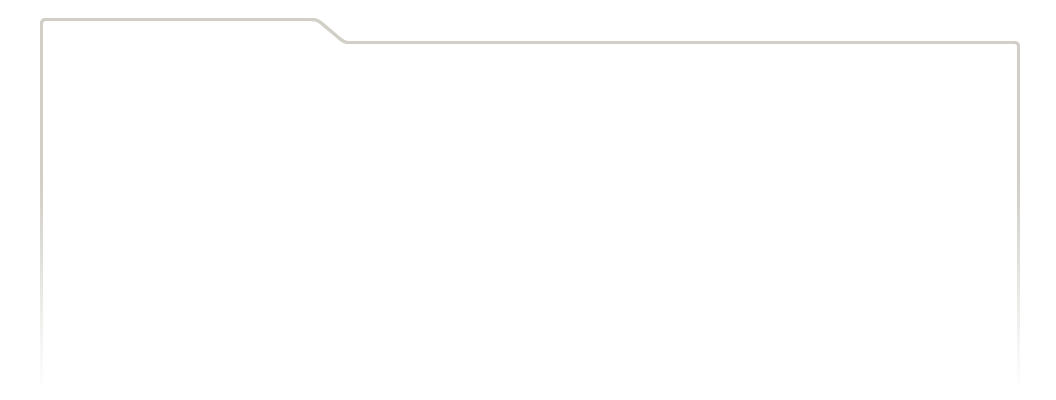
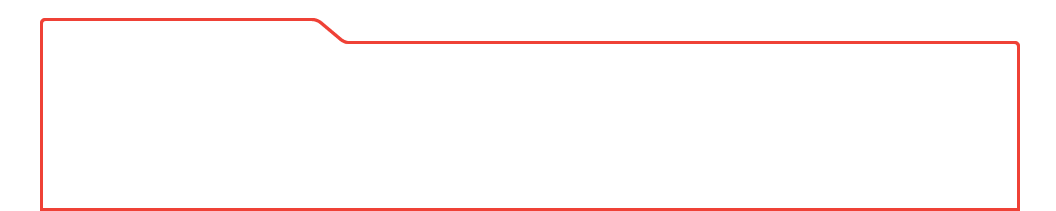
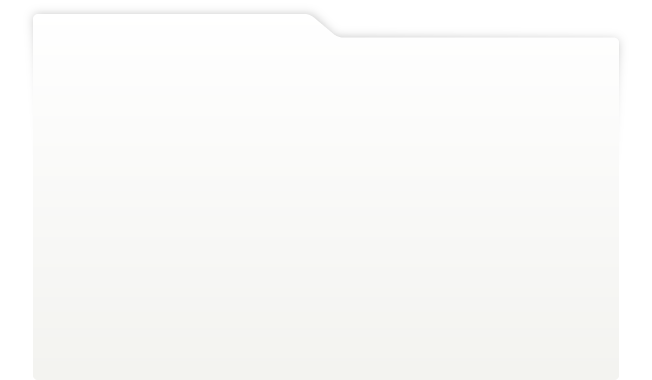
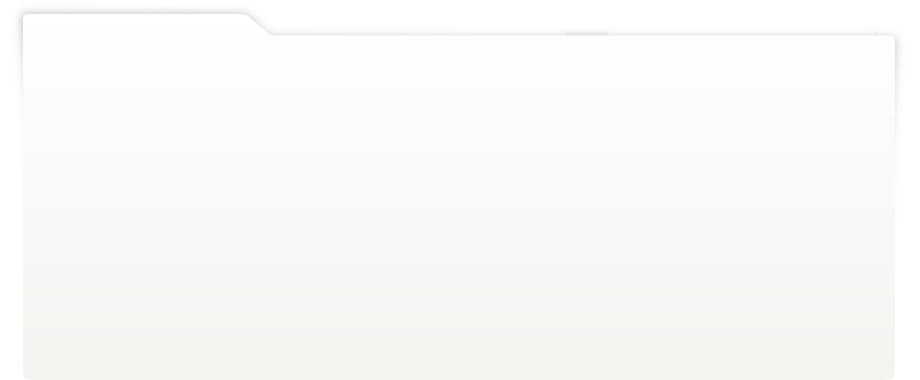
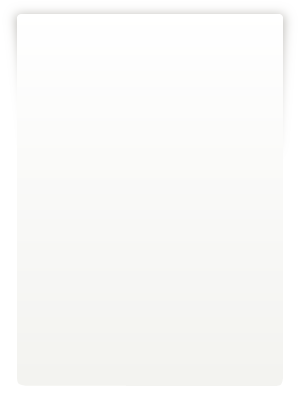
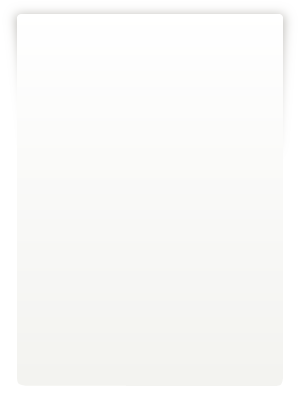
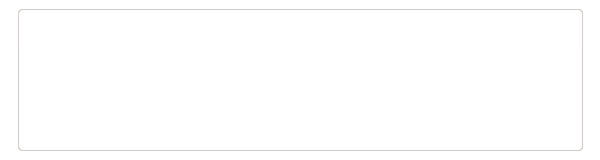
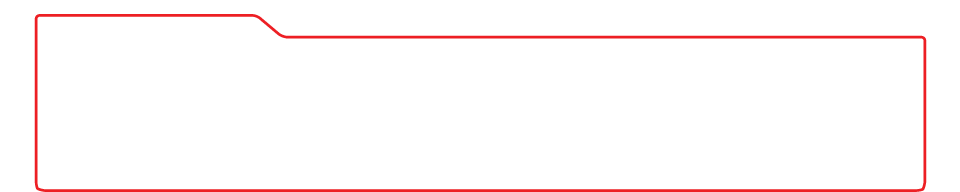
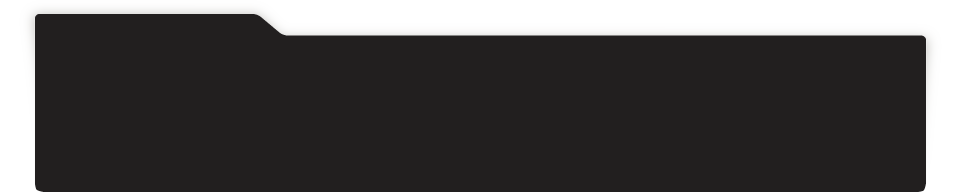
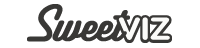
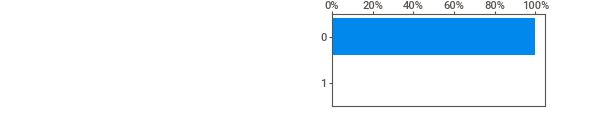
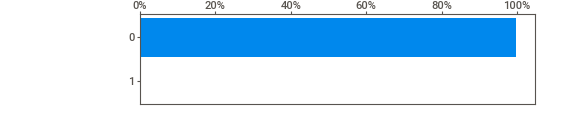
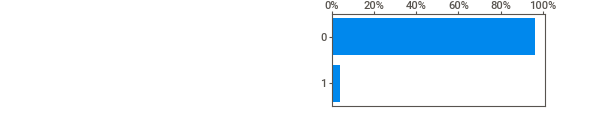
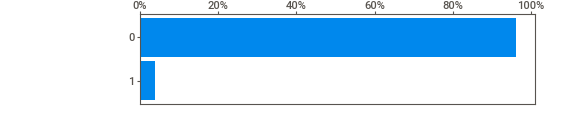
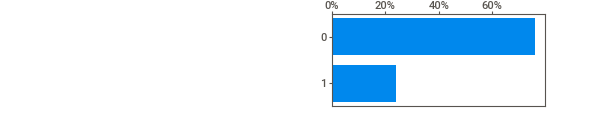
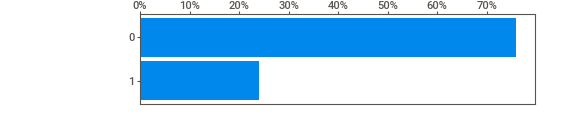
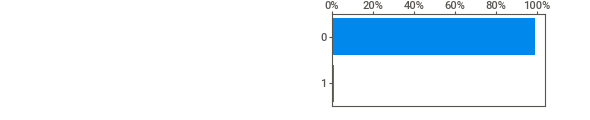
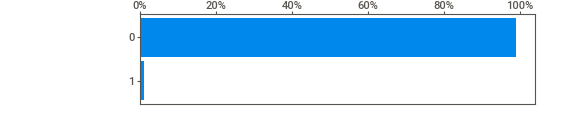
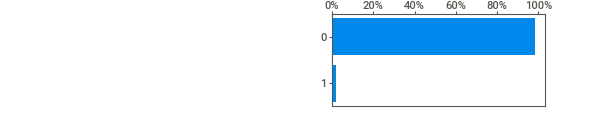
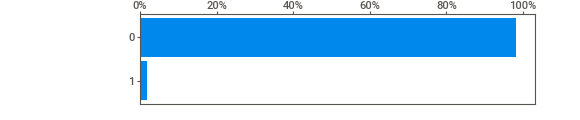
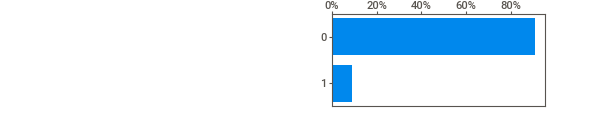
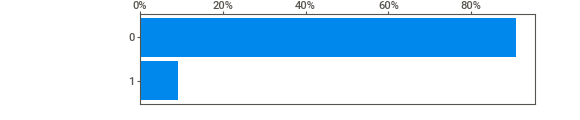
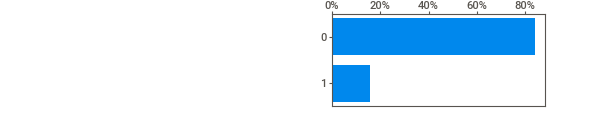
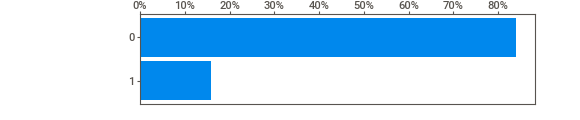
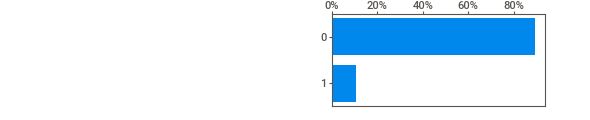
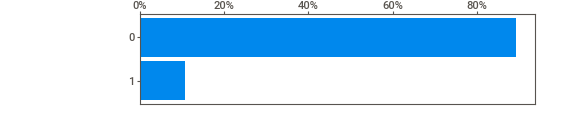
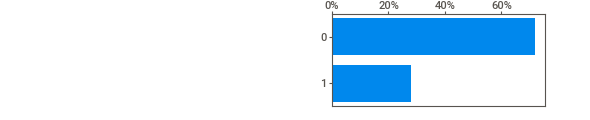
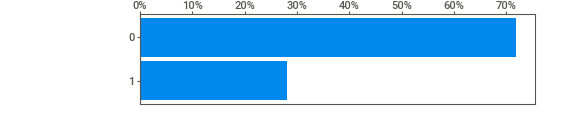
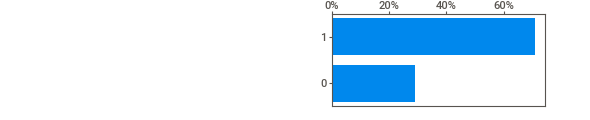
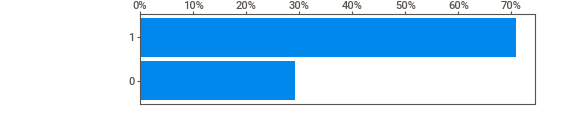
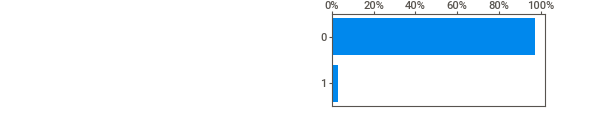
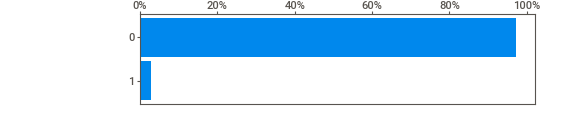
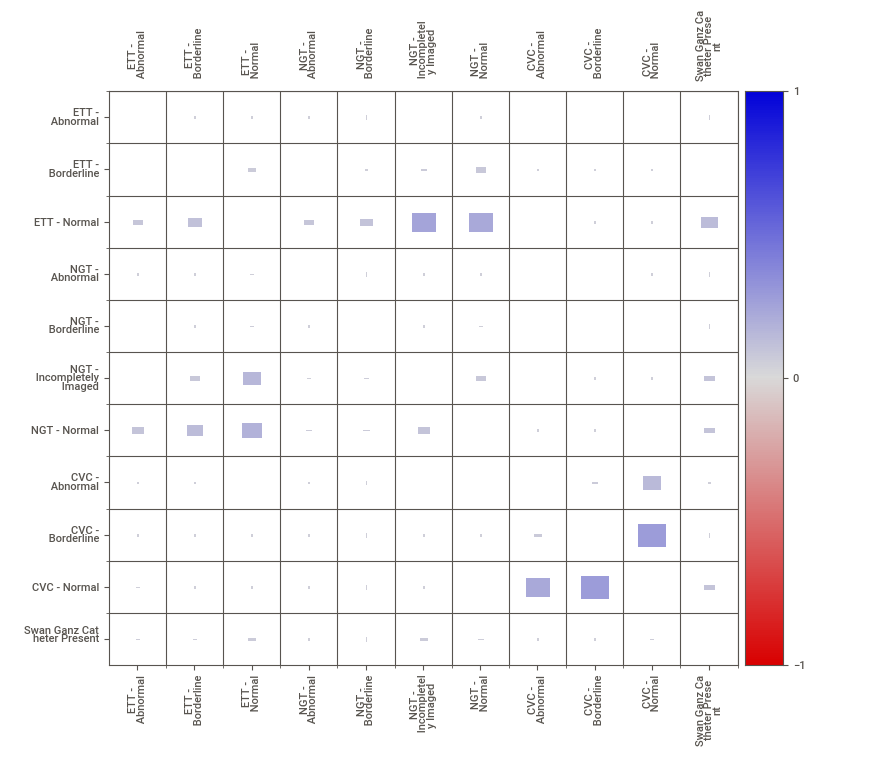
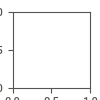

In [16]:
advert_report = sv.analyze(df)
advert_report.show_notebook()

In [ ]:
label_cols = ['ETT - Abnormal', 'ETT - Borderline',
       'ETT - Normal', 'NGT - Abnormal', 'NGT - Borderline',
       'NGT - Incompletely Imaged', 'NGT - Normal', 'CVC - Abnormal',
       'CVC - Borderline', 'CVC - Normal', 'Swan Ganz Catheter Present']

## shared catheter types in the same patient

### aggregating by catheter type

In [47]:
catheters = ['CVC', 'ETT' , 'NGT', 'Swan Ganz Catheter Present']
catheter_df = pd.DataFrame(index=df.index, columns=catheters)
labels = df.select_dtypes(int).columns
for catheter in catheters:
    group_cols = [label for label in labels if catheter in label]
    catheter_df[catheter] = df[group_cols].sum(axis=1) 

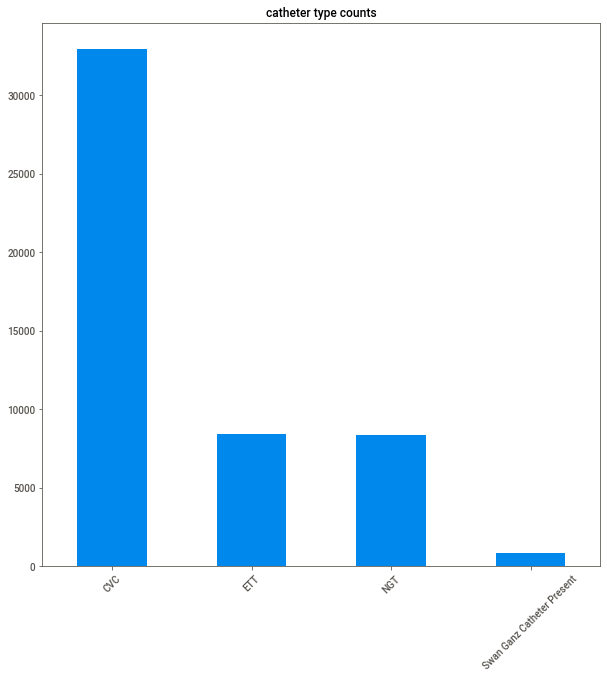

In [53]:
catheter_df.sum().plot(kind='bar', rot=45, figsize=(10,10), fontsize=10, title='catheter type counts')
plt.show()

### binarizing type data frame 

In [54]:
catheter_df_bin = catheter_df.where(catheter_df == 0, 1) # if not 0 convert to 1

### venn plots

In [28]:
cat_trios = set(list(tuple(sorted(item)) for item in list(permutations(catheters, 3))))
for cat_trio in cat_trios:
    #catheter_df[cat_trio]
    pass

,CVC,ETT,NGT,Swan Ganz Catheter Present
0,0,0,1,0
1,1,1,1,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
30078,1,1,0,0
30079,1,0,0,0
30080,1,1,1,0
30081,1,0,0,0


In [ ]:
for col in label_cols: 
    sns.countplot(x=col, data=df)
    plt.show()

In [ ]:
df[label].loc[(df[label].values==1) & (df[query].values==1)]

In [ ]:
cat_trios = set(list(tuple(sorted(item)) for item in list(permutations(catheters, 3))))
for cat_trio in cat_trios:
    #catheter_df[cat_trio]
    pass

In [ ]:
cat_trios

In [ ]:
catheter_df[list(cat_trio)]

In [ ]:
labels = df.select_dtypes(int).columns.to_list()
while labels:
    label = labels.pop()
    label_values = df[label].values
    for query in labels:
        query_values = df[query].values
        shared = np.sum((label_values==1) & (query_values==1))
        if shared != 0:
            print('-'*80)
            print('There are {} records labeled by "{}" and {} labeled as "{}"'.format(np.sum(label_values), label, np.sum(query_values), query))
            print('Both labels share {} recors'.format(np.sum(shared)))

In [ ]:
venn2()